In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df=df.drop(columns=['CUST_ID'])
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [5]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
#dropping 1 credit limit row bc missing
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [7]:
#fill missing values with means
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [8]:
#recheck missing 
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

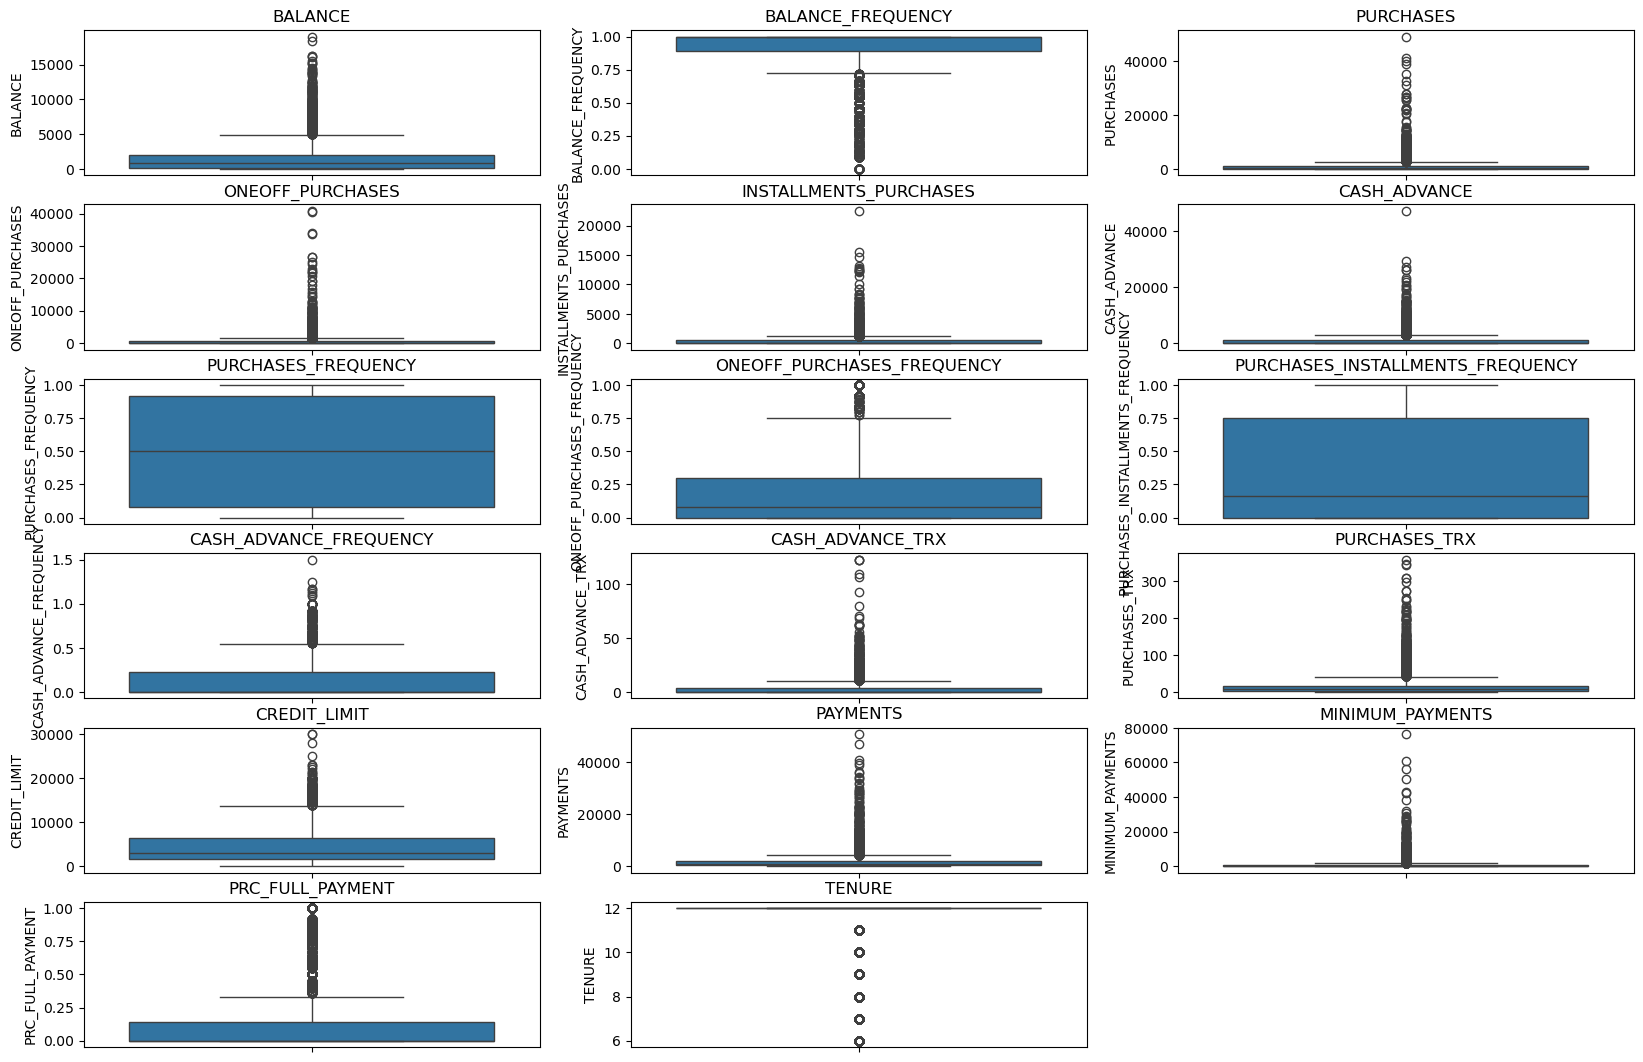

In [10]:
num_col= df.select_dtypes(include='number').columns
#check outliers
columns = num_col
plt.figure(figsize=(20,20))

for i, col in enumerate(columns, 1):
    plt.subplot(9,3,i)
    sns.boxplot(df[col])
    plt.title(col)
    
plt.show()

In [11]:
Q1 = df.quantile(0.25)  
Q3 = df.quantile(0.75)  
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
cdf = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [13]:
processed_df = pd.DataFrame(cdf, columns=df.columns)
processed_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.000,0.0,2784.671635,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.170,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.722223,1499.00,1444.575,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
cor=processed_df.corr()
cor

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.403359,0.095726,0.124008,0.009388,0.557378,-0.109055,0.081410,-0.096569,0.497134,0.500910,0.057041,0.488550,0.350490,0.802901,-0.420053,NaN
BALANCE_FREQUENCY,0.403359,1.000000,0.184839,0.149431,0.160937,0.102768,0.222022,0.199080,0.180526,0.186733,0.175418,0.247935,0.107994,0.133126,0.306382,-0.183632,NaN
PURCHASES,0.095726,0.184839,1.000000,0.830649,0.706119,-0.177149,0.631860,0.683505,0.488879,-0.207601,-0.190073,0.808531,0.330422,0.501094,0.071360,0.212891,NaN
ONEOFF_PURCHASES,0.124008,0.149431,0.830649,1.000000,0.286757,-0.116900,0.408085,0.821897,0.152841,-0.127122,-0.117991,0.622346,0.321511,0.422139,0.044988,0.091023,NaN
INSTALLMENTS_PURCHASES,0.009388,0.160937,0.706119,0.286757,1.000000,-0.185513,0.688288,0.249337,0.780174,-0.220029,-0.200248,0.725455,0.191936,0.324077,0.052501,0.254219,NaN
CASH_ADVANCE,0.557378,0.102768,-0.177149,-0.116900,-0.185513,1.000000,-0.319594,-0.134874,-0.264652,0.769790,0.801419,-0.203859,0.258427,0.331274,0.420847,-0.227237,NaN
PURCHASES_FREQUENCY,-0.109055,0.222022,0.631860,0.408085,0.688288,-0.319594,1.000000,0.499455,0.862921,-0.336820,-0.315466,0.795174,0.118205,0.163807,-0.052786,0.316303,NaN
ONEOFF_PURCHASES_FREQUENCY,0.081410,0.199080,0.683505,0.821897,0.249337,-0.134874,0.499455,1.000000,0.143412,-0.121830,-0.118701,0.650276,0.293019,0.336861,0.007170,0.123229,NaN
PURCHASES_INSTALLMENTS_FREQUENCY,-0.096569,0.180526,0.488879,0.152841,0.780174,-0.264652,0.862921,0.143412,1.000000,-0.285151,-0.264166,0.700119,0.057755,0.120878,-0.023401,0.266624,NaN
CASH_ADVANCE_FREQUENCY,0.497134,0.186733,-0.207601,-0.127122,-0.220029,0.769790,-0.336820,-0.121830,-0.285151,1.000000,0.930226,-0.217618,0.128309,0.213980,0.360468,-0.268727,NaN


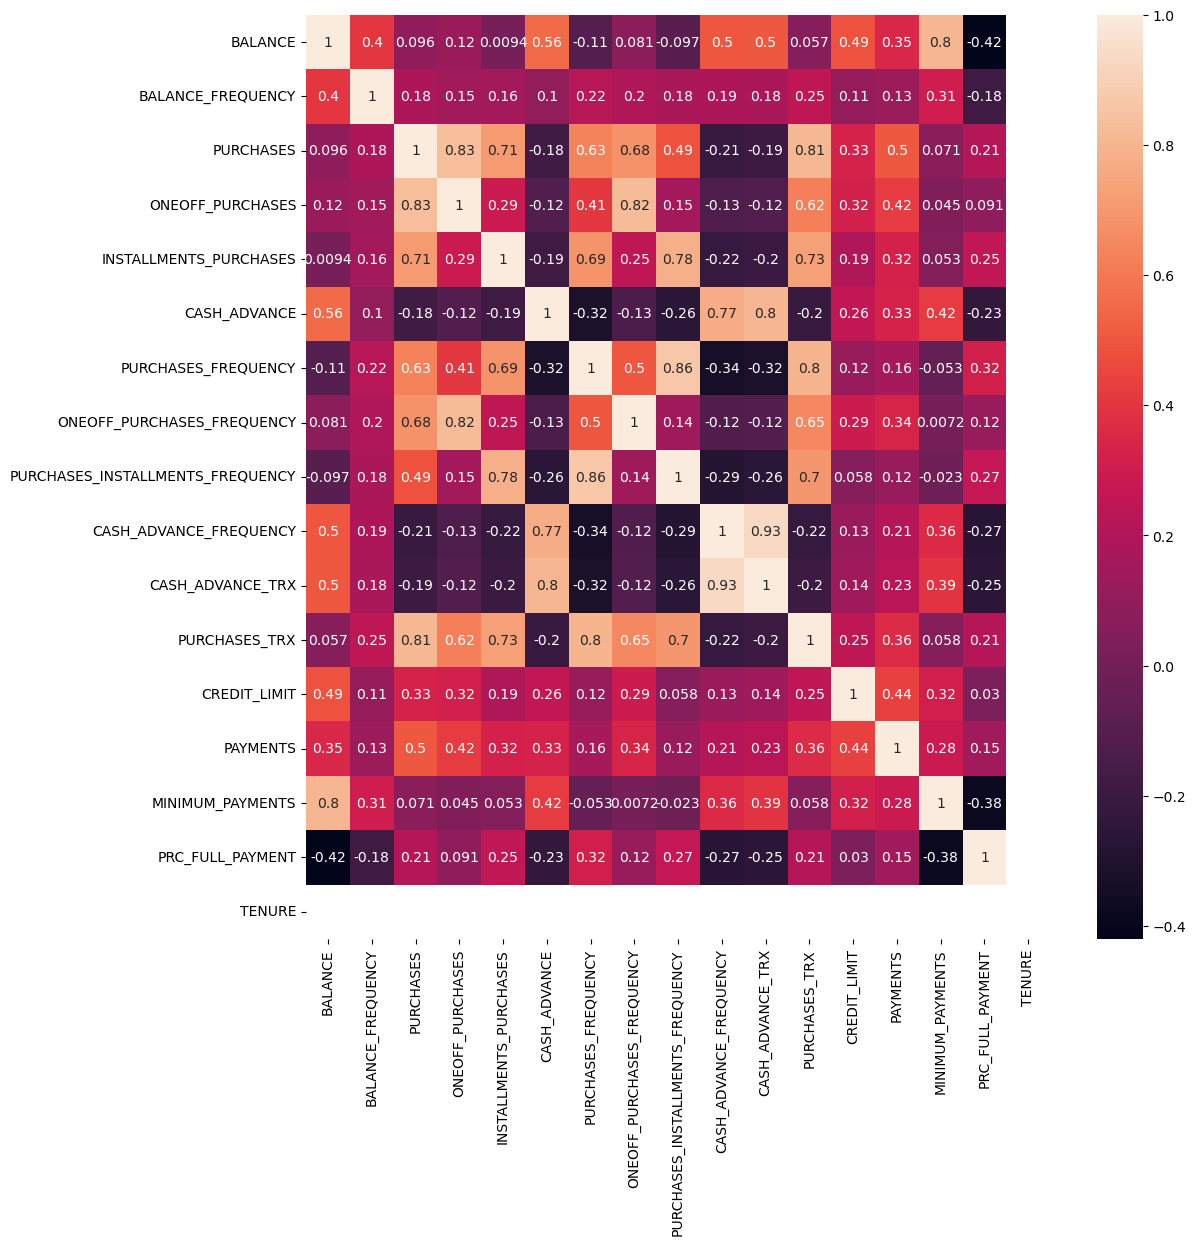

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True)
plt.show()

In [21]:

scaler = StandardScaler()
processed_df = scaler.fit_transform(processed_df)
processed_df = pd.DataFrame(processed_df,columns=df.columns)
processed_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.794138,-0.629326,0.0
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.836534,0.973858,0.0
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.058537,-0.629326,0.0
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,0.472870,-0.629326,0.0
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.610097,-0.629326,0.0


In [24]:
pca = PCA(n_components=2)
final_df = pca.fit_transform(processed_df)

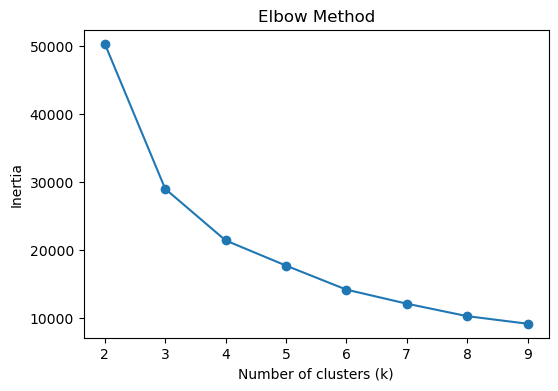

In [25]:
#choosing K before kmeans 

#elbow

inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(final_df)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

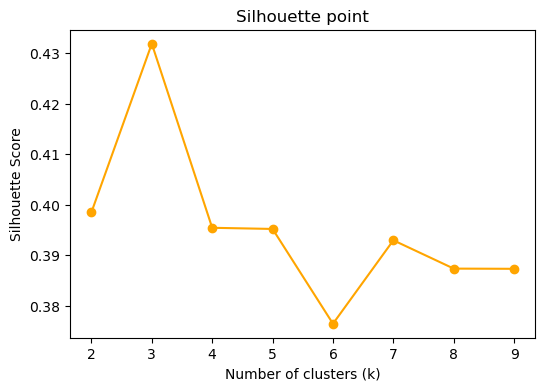

In [27]:

from sklearn.metrics import silhouette_score
sil_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(final_df)
    score = silhouette_score(final_df, labels)
    sil_scores.append(score)

plt.figure(figsize=(6,4))
plt.plot(range(2, 10), sil_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette point')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit(final_df)

In [29]:
labels=kmeans.labels_
labels

array([2, 0, 1, ..., 2, 2, 2], dtype=int32)

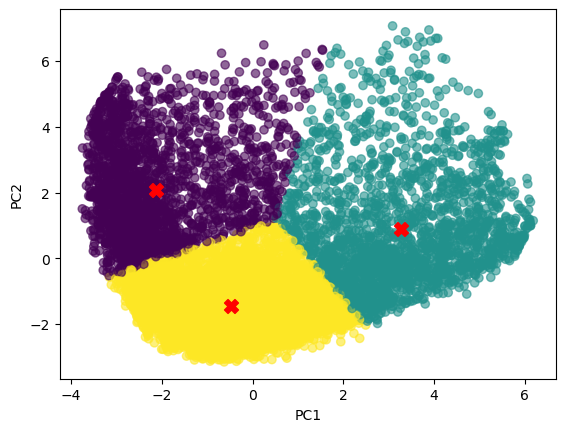

In [30]:
# Plot
plt.scatter(final_df[:,0], final_df[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', marker='X', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [32]:
pca_df = pd.DataFrame(final_df, columns=['PC1', 'PC2'])

# Add cluster labels
pca_df['Cluster'] = labels

In [33]:
original_df_with_clusters = pd.concat([processed_df, pca_df['Cluster']], axis=1)
original_df_with_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.794138,-0.629326,0.0,2
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.836534,0.973858,0.0,0
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.058537,-0.629326,0.0,1
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,0.472870,-0.629326,0.0,2
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.610097,-0.629326,0.0,2


In [34]:
cluster_summary = original_df_with_clusters.groupby('Cluster').mean()
cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,0.927879,0.289903,-0.568322,-0.398743,-0.559661,1.245177,-0.761603,-0.400902,-0.653571,1.234291,1.257884,-0.624933,0.314399,0.301966,0.729921,-0.447680,0.0
1,0.188212,0.433833,1.490510,1.181082,1.162042,-0.286648,1.054737,1.123943,0.868177,-0.320479,-0.299733,1.430870,0.559158,0.783893,0.151575,0.302194,0.0
2,-0.546303,-0.343082,-0.403556,-0.345346,-0.256855,-0.485242,-0.107462,-0.318010,-0.075234,-0.464297,-0.485524,-0.348089,-0.412831,-0.509978,-0.431369,0.082919,0.0


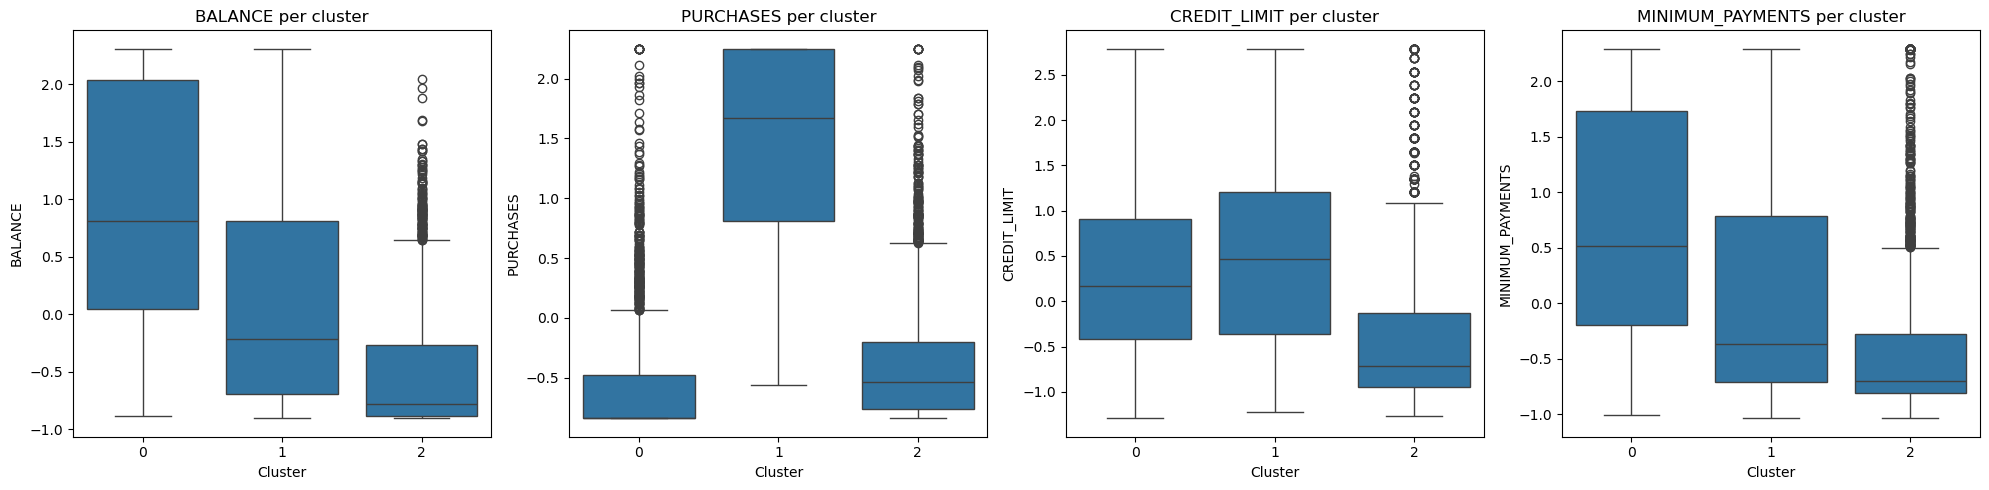

In [41]:
features_to_plot = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

plt.figure(figsize=(20,5))


for i, feature in enumerate(features_to_plot,1):  
    plt.subplot(1, 4, i)
    sns.boxplot(x='Cluster', y=feature, data=original_df_with_clusters)
    plt.title(f'{feature} per cluster')

plt.tight_layout()
plt.show()

Cluster 0: have balance but don't use credit much <br>
Cluster 1: active spender, have moderate balance, spend much <br>
Cluster 2: new/occassional user, low bal, low credit limit

In [44]:
import pickle
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('kmeans', kmeans)
])


with open('kmodel.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("saved as 'kmodel.pkl'")

saved as 'kmodel.pkl'
